#**Preprocesamiento**

En el siguiente notebook practicaremos nuestras habilidades con las distintas herramientas utilizadas para la limpieza y armonización de textos, como: expresiones regulares, tokenización y reconocimiento de entidades nombradas.

En este taller usaremos el siguiente cuento corto: [The Tale of Peter Rabbit](https://en.wikipedia.org/wiki/The_Tale_of_Peter_Rabbit) escrito por Beatrix Potter (1902).<br>  El texto es de dominio público y fue obtenido por medio del [Proyecto Gutenberg](https://www.gutenberg.org/ebooks/14838.txt.utf-8).

## **1. Carga de datos** *(Repasemos)*

Utilizando el siguiente enlace, obtenga el texto del cuento  The Tale of Peter Rabbit.

**enlace:** https://www.gutenberg.org/cache/epub/14838/pg14838.txt

In [4]:
url = https://www.gutenberg.org/cache/epub/14838/pg14838.txt


SyntaxError: invalid syntax (<ipython-input-4-aac12d6f7f9b>, line 1)

In [2]:
import requests

In [3]:
texto = requests.get(url).text

NameError: name 'url' is not defined

Ahora que hemos cargado nuestro corpus, es necesario realizar diferentes procesos para transformarlo en un conjunto de datos interpretable por distintos algoritmos.

## **2. Expresiones regulares:**

Las expresiones regulares son utilizadas para la búsqueda, eliminación o reemplazo de patrones exactos dentro de un texto. Veamos algunos ejemplos de uso.

Para los siguientes ejercicios ten presente:

| Character | Description | Example |
|---|---|---|
| [] | A set of characters | "[a-m]" |
| \ | Signals a special sequence (can also be used to escape special characters) | "\d" |
| . | Any character (except newline character) | "he..o" |
| ^ | Starts with | "^hello" |
| $ | Ends with | "planet \$" |
| * | Zero or more occurrences | "he.*o" |
| + | One or more occurrences | "he.+o" |
| ? | Zero or one occurrences | "he.?o" |
| {} | Exactly the specified number of occurrences | "he.{2}o" |
| | | Either or | "falls|stays" |
| () | Capture and group | &nbsp; |


| Character | Description | Example |
|---|---|---|
| \A | Returns a match if the specified characters are at the beginning of the <br>string | "\AThe" |
| \b | Returns a match where the specified characters are at the beginning or at the <br>end of a word(the "r" in the beginning is making sure that the string is <br>being treated as a "raw string") | r"\bain"r"ain\b" |
| \B | Returns a match where the specified characters are present, but NOT at the beginning <br>(or at <br>the end) of a word(the "r" in the beginning is making sure that the string <br>is being treated as a "raw string") | r"\Bain"r"ain\B" |
| \d | Returns a match where the string contains digits (numbers from 0-9) | "\d" |
| \D | Returns a match where the string DOES NOT contain digits | "\D" |
| \s | Returns a match where the string contains a white space character | "\s" |
| \S | Returns a match where the string DOES NOT contain a white space character | "\S" |
| \w | Returns a match where the string contains any word characters (characters from <br>a to Z, digits from 0-9, and the underscore _ character) | "\w" |
| \W | Returns a match where the string DOES NOT contain any word characters | "\W" |
| \Z | Returns a match if the specified characters are at the end of the string | "Spain\Z" |

| Set | Description |
|---|---|
| [arn] | Returns a match where one of the specified characters (a,<br>r, or n) is <br>present |
| [a-n] | Returns a match for any lower case character, alphabetically between<br>a and n |
| [^arn] | Returns a match for any character EXCEPT a,<br>r, and n |
| [0123] | Returns a match where any of the specified digits (0,<br>1, 2, or <br>3) are <br>present |
| [0-9] | Returns a match for any digit between<br>0 and 9 |
| [0-5][0-9] | Returns a match for any two-digit numbers from 00 and <br>59 |
| [a-zA-Z] | Returns a match for any character alphabetically between<br>a and z, lower case OR upper case |
| [+] | In sets, +, *,<br>., |,<br>(), $,{} <br>has no special meaning, so [+] means: return a match for any<br>+ character in the string |



### 2.1 Busqueda de un formato

Las expresiones regulares son utilizadas para la búsqueda, eliminación o reemplazo de patrones exactos dentro de un texto. Veamos algunos ejemplos de uso:

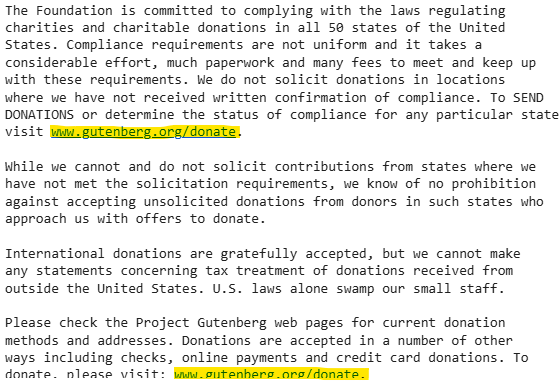

Como puedes ver, dentro del texto que extrajimos hay presentes algunos enlaces. A continuación seleccionaremos y listaremos estos URLs.

In [ ]:
import re
patron = "(www\S+)"

enlaces = re.findall(patron, cuento)
enlaces

['www.gutenberg.org.',
 'www.gutenberg.org/license.',
 'www.gutenberg.org.',
 'www.gutenberg.org),',
 'www.gutenberg.org.',
 'www.gutenberg.org/contact',
 'www.gutenberg.org/donate.',
 'www.gutenberg.org/donate.',
 'www.gutenberg.org.']

### 2.2 Eliminación de elementos

En ocasiones pueden existir patrones poco informativos que querremos eliminar para evitar subjetividades en nuestro corpus.

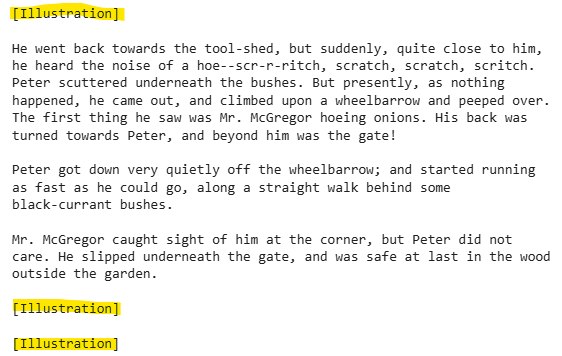

Como puedes ver, al tratarse de un libro ilustrado, existe el token [Illustration]. A continuación lo eliminaremos dado que no aporta información semántica a nuestro corpus.

In [ ]:
patron= '\[Illustration\]'
cuento_sin_ilutacion = re.sub(patron, "", cuento)
print(cuento_sin_ilutacion)

﻿The Project Gutenberg eBook of The Tale of Peter Rabbit
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: The Tale of Peter Rabbit

Author: Beatrix Potter

Release date: January 30, 2005 [eBook #14838]
                Most recently updated: September 8, 2021

Language: English

Credits: Robert Cicconetti, Ronald Holder and the PG Online Distributed Proofreading Team


*** START OF THE PROJECT GUTENBERG EBOOK THE TALE OF PETER RABBIT ***






THE TALE OF

PETER RABBIT

BY

BEATRIX POTTER



FREDERICK WARNE




FREDERICK WARNE

First published 1902

Frederick Warne & Co., 1902

Printed a

### 2.3 Remplazo de patrones

Tras eliminar algunas coincidencias, podemos ver la presencia de espacio y retornos repetidos. Ahora eliminaremos este patrón para facilitar el análisis posterior de este texto.

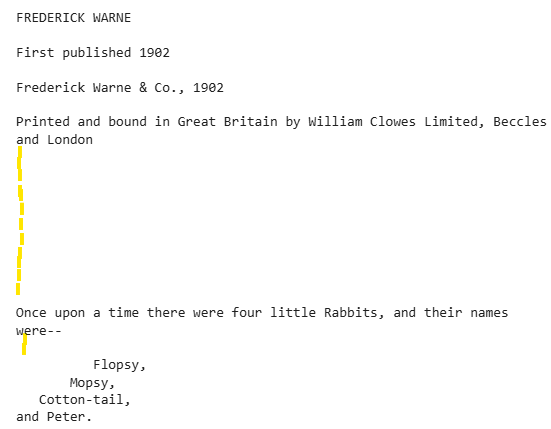

In [ ]:
patron= '(\r\n)+'
cuento_sin_ilutacion_espacio = re.sub(patron, "\n", cuento_sin_ilutacion)
print(cuento_sin_ilutacion_espacio)

### 2.4 Ejercicio

A continuación utilicé los ejemplos presentados para extraer y limpiar el texto correspondiente al cuento. Recuerde que la historia empieza y termina con las siguientes secuencias:

inicio:
\*** START OF THE PROJECT GUTENBERG EBOOK THE TALE OF PETER RABBIT ***

fin:
\*** END OF THE PROJECT GUTENBERG EBOOK THE TALE OF PETER RABBIT ***

## **3. Spacy:**

Cómo pudiste explorar a lo largo de los talleres guiados, Spacy es una herramienta poderosa para el manejo de textos en Python, repasemos algunos de sus usos.

Como veremos a lo largo del notebook SpaCy provee diferentes herramientas de NLP, no obstante, estas funcionan basadas en un corpus (Conjunto de textos relacionados con un tema), para cargar las diferentes rutinas ajustadas a los distintos corpus podemos hace uso de la función "load".

Para consultar las diferentes rutinas, revise el siguiente link: https://spacy.io/usage/models

In [ ]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 42.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

### 3.1 Procesamiento basico

Transformemos nuestro texto a un objeto SpaCy

In [ ]:
doc = nlp(historia_limpia)
print(dir(doc))
print(type(doc))

['_', '__bytes__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '_bulk_merge', '_context', '_get_array_attrs', '_realloc', '_vector', '_vector_norm', 'cats', 'char_span', 'copy', 'count_by', 'doc', 'ents', 'extend_tensor', 'from_array', 'from_bytes', 'from_dict', 'from_disk', 'from_docs', 'from_json', 'get_extension', 'get_lca_matrix', 'has_annotation', 'has_extension', 'has_unknown_spaces', 'has_vector', 'is_nered', 'is_parsed', 'is_sentenced', 'is_tagged', 'lang', 'lang_', 'mem', 'noun_chunks', 'noun_chunks_iterator', 'remove_extension', 'retokenize', 'sentiment', 'sents', 'set_ents', 'set_extension', 'similarity', 'spans', 'tens

Uno de los atributos más interesantes de un documento de SpaCy es `sents`, el cual nos permite obtener las oraciones del texto.

In [ ]:
sents = doc.sents
type(sents)

generator

In [ ]:
next(sents)


THE TALE OF
PETER RABBIT
BY
BEATRIX POTTER
FREDERICK WARNE
FREDERICK WARNE
First published 1902
Frederick Warne & Co., 1902
Printed and bound in Great Britain by William Clowes Limited, Beccles
and London

In [ ]:
sents = list(doc.sents)
print(sents[2])

They lived with their Mother in a sand-bank, underneath the root of a
very big fir-tree.



Cada una de las oraciones extraídas constituye un elemento iterable con base en un tokenizador.

In [ ]:
sent = list(doc.sents)[3]
print(sent)
print(type(sent))
print(list(sent))

'Now my dears,' said old Mrs. Rabbit one morning, 'you may go into
the fields or down the lane, but don't go into Mr. McGregor's garden:
your Father had an accident there; he was put in a pie by Mrs.
McGregor.'
'Now run along, and don't get into mischief.
<class 'spacy.tokens.span.Span'>
[', Now, my, dears, ,, ', said, old, Mrs., Rabbit, one, morning, ,, ', you, may, go, into, 
, the, fields, or, down, the, lane, ,, but, do, n't, go, into, Mr., McGregor, 's, garden, :, 
, your, Father, had, an, accident, there, ;, he, was, put, in, a, pie, by, Mrs., 
, McGregor, ., ', 
, ', Now, run, along, ,, and, do, n't, get, into, mischief, .]


### 3.2 Tokens y etiquetas

En spaCy, las etiquetas POS (Part-of-Speech) son anotaciones gramaticales que se asignan a cada token (palabra o signo de puntuación) dentro de un texto, indicando su función sintáctica en la oración. Estas etiquetas permiten identificar si un token es un sustantivo, verbo, adjetivo, etc., facilitando el análisis y la comprensión de la estructura gramatical del texto. spaCy utiliza un conjunto detallado de etiquetas POS, basadas en el proyecto Universal Dependencies, para proporcionar información precisa sobre el papel de cada palabra en la oración.

Para consultar los codigos de las etiquetas use el siguente link: https://spacy.io/usage/linguistic-features

In [ ]:
sent = list(doc.sents)[2]

for token in sent:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)
    print()

They they PRON PRP nsubj Xxxx True True

lived live VERB VBD ROOT xxxx True False

with with ADP IN prep xxxx True True

their their PRON PRP$ poss xxxx True True

Mother Mother PROPN NNP pobj Xxxxx True False

in in ADP IN prep xx True True

a a DET DT det x True True

sand sand NOUN NN compound xxxx True False

- - PUNCT HYPH punct - False False

bank bank NOUN NN pobj xxxx True False

, , PUNCT , punct , False False

underneath underneath ADP IN prep xxxx True False

the the DET DT det xxx True True

root root NOUN NN pobj xxxx True False

of of ADP IN prep xx True True

a a DET DT det x True True


 
 SPACE _SP dep 
 False False

very very ADV RB advmod xxxx True True

big big ADJ JJ amod xxx True False

fir fir NOUN NN compound xxx True False

- - PUNCT HYPH punct - False False

tree tree NOUN NN pobj xxxx True False

. . PUNCT . punct . False False


 
 SPACE _SP dep 
 False False



Para obtener mas información de cada etiqueta usa:

In [ ]:
spacy.explain('AUX')

'auxiliary'

Estas etiquetas poseen una relación lingüística entre ellas; dichas relaciones son visualizables por medio del grafo de dependencias.

In [ ]:
from spacy import displacy
sent = list(doc.sents)[1]

displacy.render(sent, style='dep', jupyter=True, options={'distance': 150})

### 3.3 Ejercicio

Utilice el tokenizador de SpaCy para establecer los n token más comunes. Ignore aquellos  con la etiqueta DE, ADV, PUNCT, _CONJ.

## **4. Tokenizador: Byte-Pair Encoding (BPE)**

El algoritmo Byte Pair Encoding (BPE) es una técnica de tokenización que descompone palabras en subpalabras, lo que resulta especialmente útil para manejar palabras desconocidas en modelos de lenguaje. El proceso comienza con un vocabulario inicial compuesto por caracteres individuales. Luego, de manera iterativa, identifica y fusiona los pares de símbolos consecutivos que ocurren con mayor frecuencia en el texto de entrenamiento. Este proceso se repite hasta alcanzar un tamaño de vocabulario predefinido, donde los nuevos tokens resultantes se añaden al vocabulario.

Este enfoque permite que el modelo de lenguaje maneje palabras que no estaban presentes en el conjunto de entrenamiento, ya que puede descomponerlas en subpalabras conocidas. Además, BPE ayuda a reducir el tamaño del vocabulario en comparación con la tokenización a nivel de palabra completa, lo que mejora la eficiencia del modelo.

In [ ]:
%%capture
!pip install sentencepiece

In [ ]:
sent = list(doc.sents)[2]
str(sent)

'They lived with their Mother in a sand-bank, underneath the root of a\nvery big fir-tree.\n'

In [ ]:
import sentencepiece as spm

data = set(historia_limpia.replace('\n',' ').split(' '))

with open("train.txt", "w") as f:
    for item in data:
        f.write(item + "\n")


spm.SentencePieceTrainer.train(
    input="train.txt",
    model_prefix="bpe_model",
    vocab_size=100,  # Ajusta el tamaño del vocabulario según tus necesidades
    model_type="bpe",
)

sp = spm.SentencePieceProcessor(model_file="bpe_model.model")

sent = list(doc.sents)[2]
tokens = sp.encode(str(sent), out_type=str)
print(tokens)

['▁', 'T', 'h', 'e', 'y', '▁l', 'i', 'v', 'ed', '▁w', 'it', 'h', '▁th', 'e', 'i', 'r', '▁', 'M', 'ot', 'h', 'er', '▁', 'in', '▁a', '▁s', 'an', 'd', '-', 'b', 'an', 'k', ',', '▁', 'un', 'd', 'er', 'n', 'e', 'at', 'h', '▁th', 'e', '▁r', 'oo', 't', '▁', 'o', 'f', '▁a', '▁', 'v', 'er', 'y', '▁b', 'i', 'g', '▁f', 'i', 'r', '-', 't', 're', 'e', '.']
